#**Preámbulo**

Este caso de uso enseña un modelo de tipo Solow diseñado por el banco mundial para explicar el rápido crecimiento de Corea del Sur. Es recomendable leerse el caso de uso "Modelo de Solow: Versión principiante" antes de leer este ya que daré por entendidas ciertas operaciones que realicé en ese caso de uso.

#**1.Introducción**

Al igual que en el modelo de Solow, este modelo sirve para explicar el crecimiento de una economía descomponiéndolo en todas las variables que creamos que lo determinan. En el caso de este trabajo, el Banco Mundial considera que el crecimiento viene determinado por:

1-Stock de capital (K). Es el valor de todas las máquinas, herramientas, edificios...; de un país en un momento dado.

2-Productividad total de los factores (A). Mide cuán productivo es un país en el sentido de cuanto le cuesta llegar a hacer un producto con el capital y trabajo del que dispone. Para Solow cuando esta variable aumenta es que se ha realizado un progreso de la tecnología.

3-Tasa de participación del capital en la economía (Alpha). Esta variable mide cuanto del PIB de un país viene producido por el capital. En este paper llaman a esta variable beta pero voy a llamarla alpha en este caso de uso para guardar la coherencia con el caso de uso anterior

4-Producto (Y). Es la producción total del país en un momento dado, o lo que solemos entender por PIB.

5-Capital humano (h). Esta variable mide la educación de un país, la intuición detrás es que cuanto más culto sea un país el crecimiento será mayor.

6-Población activa (Sw). Mide qué fracción de la población quiere y puede trabajar excluyendo de ella a niños, jubilados, amas de casa, etc.

6-Tasa de empleo (Se). Mide qué fracción de la población activa trabaja. Esto se da porque a pesar de que muchas personas quieren y tienen la capacidad de trabajar, no encuentran trabajo creando una parte de la población que llamaríamos desempleada.

De esta forma, uniendo todas las variables el modelo quedaría de esta forma:


$$y=Sw*Se*A*(K/Y)^{((1-alpha)/alpha)}*h$$

Aquí, "y" es el PIB per cápita y K/Y es el ratio capital-producto del país. 

El por qué realizan esta fracción en vez de observar el crecimiento puro del capital es que consideran que este ratio aisla mejor el efecto del crecimiento de capital sobre el crecimiento de la economía.

La intuición es que un aumento de la productividad conlleva un aumento del capital pero no de K/Y así que para evitar inconsistencias en el modelo tienen que realizar este ratio. Es decir, el ratio K/Y no esta correlacionado con A pero la variable K sin fraccionar si que está correlacionada.

#**2.Realizamos este modelo de tipo Solow para España**



##**2.1.Extraemos las variables que necesitamos**

Una vez tenemos el marco teórico del modelo que queremos realizar, obtenemos los datos que necesitamos y lo reproducimos en python

In [2]:
#Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#Descargamos nuestro dataset en google colab
from google.colab import files
uploaded=files.upload()

datos=pd.read_excel('Modelo de Solow avanzado.xlsx')
datos.head()

Saving Modelo de Solow avanzado.xlsx to Modelo de Solow avanzado.xlsx


,Año,Población,PIB,Stock de capital,Capital humano,Salarios,Tasa de empleo,Tasa de actividad
0,2002,41837894,749552000000,3707725000000,2.668127,358872000000,88.39,54.95
1,2003,42717064,802266000000,4064268000000,2.684631,380155000000,88.63,56.25
2,2004,43197684,859437000000,4482428000000,2.701237,405612000000,89.47,57.12
3,2005,44108530,927357000000,4936537000000,2.717946,435359000000,91.29,58.08
4,2006,44708964,1003823000000,5360784000000,2.734758,471840000000,91.74,58.88


Hecho esto, extraemos las variables del dataset

In [12]:
Y=datos['PIB']
L=datos['Población']
K=datos['Stock de capital']
h=datos['Capital humano']
se=datos['Tasa de empleo']
sw=datos['Tasa de actividad']

w=datos['Salarios']

Fecha=datos['Año']

In [13]:
#Establecemos una variable de PIB per cápita
y=Y/L

In [14]:
#Creamos la variable de alpha dividiendo la cantidad total de salarios por el producto
alpha=1-w/Y

Como expliqué en el caso de uso anterior, tenemos que hacer que alpha sea una constante ya que tanto Solow como los investigadores de este paper asumen que la tasa de participación laboral en la economía no varía en el tiempo. La volvemos una constante cogiendo la media de esta variable en el período analizado.

In [20]:
m_alpha=np.mean(alpha, axis=0)
m_alpha

0.5291314970978401

In [15]:
#Creamos una variable que sea el ratio capital-producto
ky=K/Y

##**2.2.Despejamos la productividad**

Tal y como expliqué en el anterior caso de uso, en el modelo de Solow usan el logaritmo neperiano para sacar las tasas de crecimiento de cada variable usando la regla matemática de que el logaritmo de una variable en el período 1 menos el logaritmos de esa variable en el período 0 es aproximadamente la tasa de crecimiento entre esos dos períodos. 

Así que, logaritmizamos el modelo y operamos y nos queda la ecuación:

$$gy=gsw+gse+ga+((1-alpha)/alpha)*gky+gh$$

Donde g delante de cada variable significa su tasa de crecimiento.

Ahora, despejamos ga ya que es la única variable que desconocemos y nos queda:

$$ga=gy-gsw-gse-gh-((1-alpha)/alpha)*gky$$

In [16]:
#Calculamos la tasa de crecimiento de cada variable
gy=np.log(y).diff()
gsw=np.log(sw).diff()
gse=np.log(se).diff()
gky=np.log(ky).diff()
gh=np.log(h).diff()


In [21]:
#Calculamos la tasa de creciiento de la productividad en base a la ecuación anterior
ga=gy-gsw-gse-((1-m_alpha)/m_alpha)*gky-gh
ga.tail()

13    0.027221
14    0.008959
15    0.022536
16    0.000760
17    0.007259
dtype: float64

##**2.3.Conclusiones sobre este modelo para España**

Con esto, ya hemos contabilizado como ha crecido la productividad en España a lo largo del tiempo. Vamos a visualizarlo:

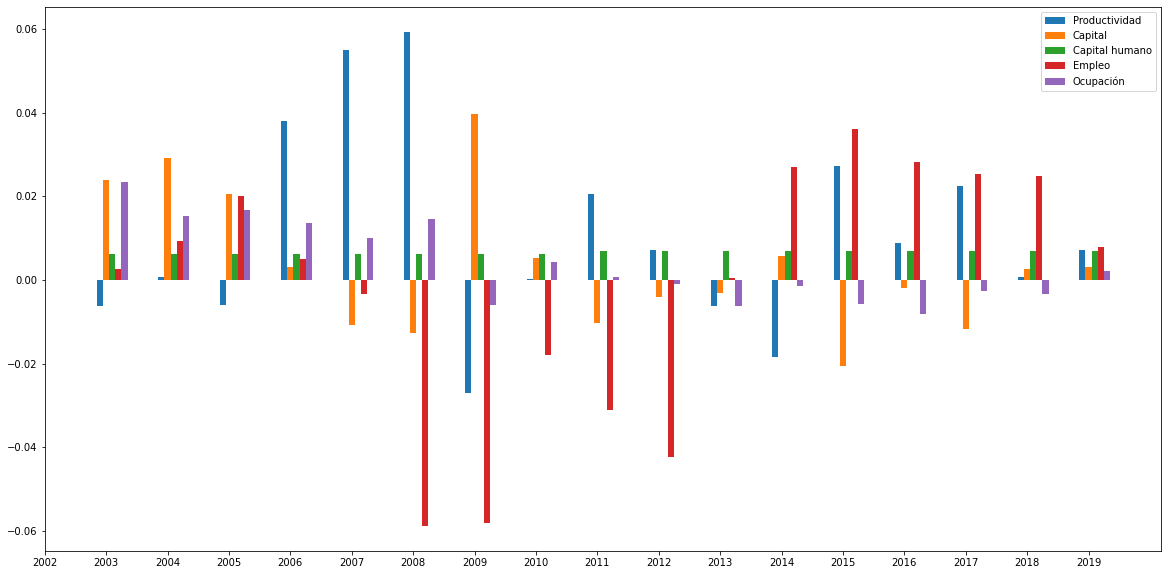

In [22]:
numero_de_grupos=len(gy)
indice_barras=np.arange(numero_de_grupos)
width=0.1

fig,(ax1)=plt.subplots(1,1)
plt.bar(indice_barras,ga,width,label='Productividad')
plt.bar(indice_barras+width,gky,width,label='Capital')
plt.bar(indice_barras+width+width, gh, width, label='Capital humano')
plt.bar(indice_barras+width+width+width, gse, width, label='Empleo')
plt.bar(indice_barras+width+width+width+width,gsw,width,label='Ocupación')

plt.legend(loc='best')

plt.xticks(indice_barras + width, Fecha)

fig.set_figwidth(20)
fig.set_figheight(10)

Como podemos ver, durante los años del boom inmobiliario el factor que principalmente hacía crecer la economía era el capital lo cuál nos cuadra con lo que sabemos. Además, podemos ver como el factor que más influyó en la caída de la actividad económica en España durante la crisis del 2008 fue la caída en la tasa de empleo lo cuál también nos cuadra con el contexto histórico.

Es importante resaltar la importancia que tuvo el empleo en la crisis del 2008 porque en el modelo de Solow simple que hemos hecho en el caso de uso anterior, hemos visto como los resultados eran que la fuerte caída económica de esos años era producida por una gran contracción en la productividad mientras que este modelo nos dice que la contracción fue debida a una caída en el empleo. 

Así que, como conclusión, es muy importante qué modelo usas a la hora de explicar los ciclos económicos de un país. Existen multitud de modelos en economía y se podría decir que uno de los grandes puntos de debate dentro del mundo académico es sobre qué modelo es mejor para explicar como y por qué crece un país. 

Si quieres dedicarte a la investigación o hacer un trabajo sobre crecimiento, lo primero que tienes que hacer es elegir bien que modelo de crecimiento quieres usar y por qué.

#**3.Bibliografía**

Hyeok Jeong. Korea's growth experience and long term growth model. World bank